In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
from IPython.display import display

Hungarian map showing the counties:


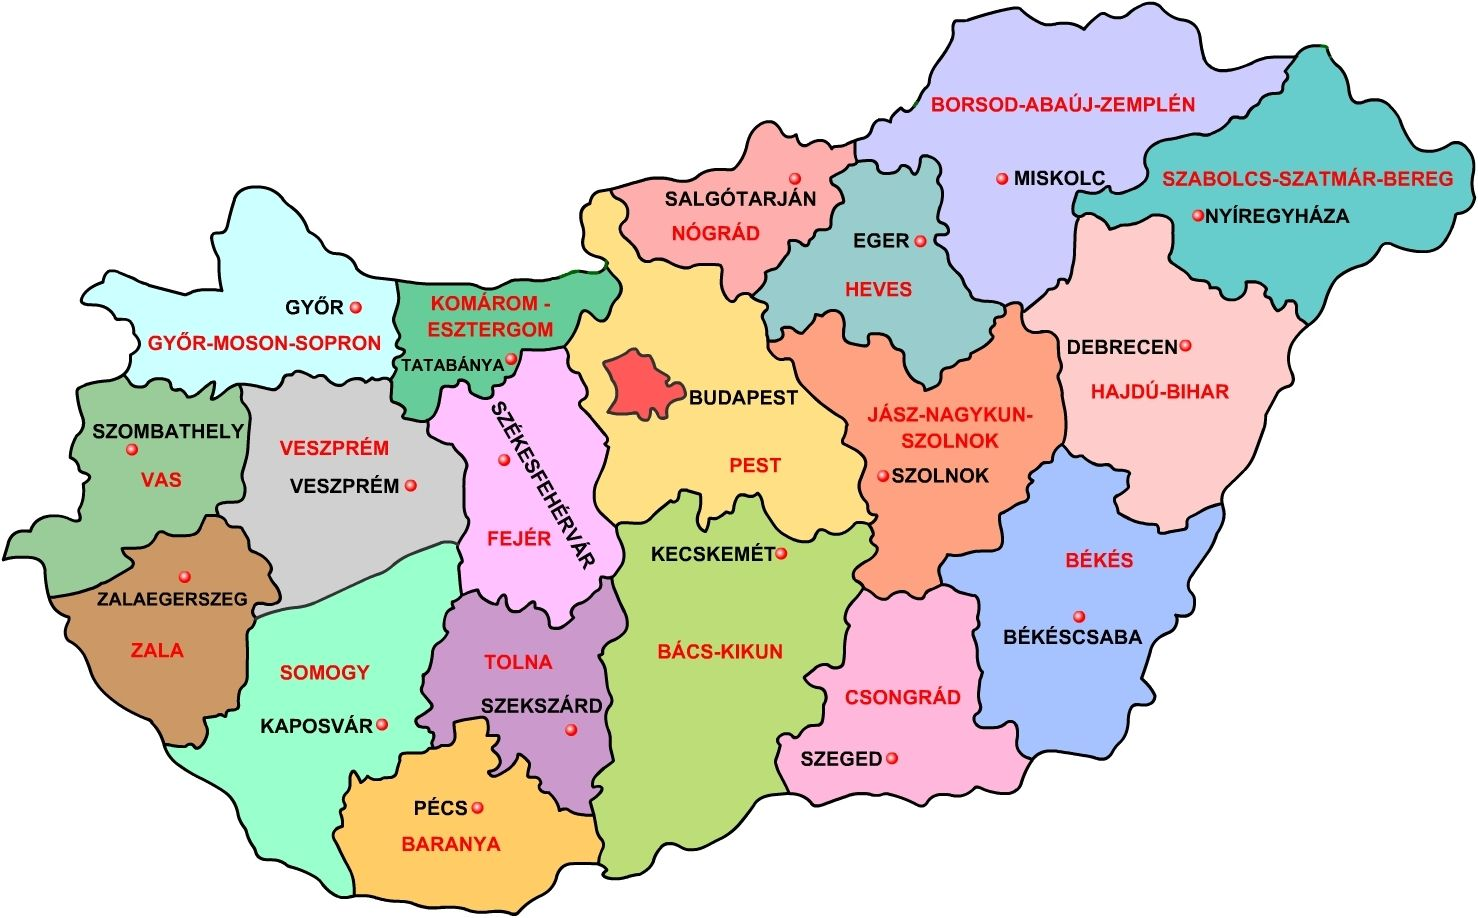

In [3]:
print("Hungarian map showing the counties:")

path="hungary.jpg"
display(Image.open(path))

In [4]:
# Load the dataset
temporal = pd.read_csv("hungary_chickenpox.csv")
spatial = pd.read_csv('hungary_county_edges.csv')

In [5]:
temporal.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [6]:
spatial.head()

,name_1,name_2,id_1,id_2
0,BACS,JASZ,0,10
1,BACS,BACS,0,0
2,BACS,BARANYA,0,1
3,BACS,CSONGRAD,0,5
4,BACS,PEST,0,13


In [7]:
df = {'County': spatial['name_1'].unique()}
df = pd.DataFrame(df)

df

,County
0,BACS
1,BARANYA
2,BEKES
3,BORSOD
4,BUDAPEST
5,CSONGRAD
6,FEJER
7,GYOR
8,HAJDU
9,HEVES


In [8]:
spatial[['name_1', 'id_1']].drop_duplicates()

,name_1,id_1
0,BACS,0
7,BARANYA,1
11,BEKES,2
15,BORSOD,3
21,BUDAPEST,4
23,CSONGRAD,5
27,FEJER,6
34,GYOR,7
38,HAJDU,8
43,HEVES,9


In [9]:
county_dict = {}

for county in spatial['name_1'].unique():
    df[county] = np.zeros(20)

df = df.reset_index().rename(columns = {'index': 'id'})

df

,id,County,BACS,BARANYA,BEKES,BORSOD,BUDAPEST,CSONGRAD,FEJER,GYOR,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,0,BACS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,BARANYA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,BEKES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,BORSOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,BUDAPEST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,CSONGRAD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,FEJER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,GYOR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,HAJDU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,HEVES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
len(df.columns)

22

In [11]:
df = df[df.columns[[1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]]

df.head()

,County,id,BACS,BARANYA,BEKES,BORSOD,BUDAPEST,CSONGRAD,FEJER,GYOR,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,BACS,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BARANYA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BEKES,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BORSOD,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUDAPEST,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
spatial[spatial['name_1'] == 'BACS']['name_2'].tolist()

['JASZ', 'BACS', 'BARANYA', 'CSONGRAD', 'PEST', 'FEJER', 'TOLNA']

In [13]:
county_list = spatial['name_1'].unique().tolist()

In [14]:
boundary_sharing = {}

for county in county_list:
    boundary_sharing[county] = spatial[spatial['name_1'] == county]['name_2'].tolist()

boundary_sharing

{'BACS': ['JASZ', 'BACS', 'BARANYA', 'CSONGRAD', 'PEST', 'FEJER', 'TOLNA'],
 'BARANYA': ['BARANYA', 'TOLNA', 'SOMOGY', 'BACS'],
 'BEKES': ['HAJDU', 'BEKES', 'JASZ', 'CSONGRAD'],
 'BORSOD': ['HEVES', 'SZABOLCS', 'HAJDU', 'BORSOD', 'NOGRAD', 'JASZ'],
 'BUDAPEST': ['PEST', 'BUDAPEST'],
 'CSONGRAD': ['JASZ', 'BACS', 'BEKES', 'CSONGRAD'],
 'FEJER': ['FEJER', 'SOMOGY', 'KOMAROM', 'TOLNA', 'BACS', 'PEST', 'VESZPREM'],
 'GYOR': ['VESZPREM', 'KOMAROM', 'GYOR', 'VAS'],
 'HAJDU': ['JASZ', 'HAJDU', 'SZABOLCS', 'BEKES', 'BORSOD'],
 'HEVES': ['NOGRAD', 'JASZ', 'PEST', 'HEVES', 'BORSOD'],
 'JASZ': ['JASZ',
  'CSONGRAD',
  'HEVES',
  'BORSOD',
  'PEST',
  'BEKES',
  'BACS',
  'HAJDU'],
 'KOMAROM': ['GYOR', 'FEJER', 'KOMAROM', 'VESZPREM', 'PEST'],
 'NOGRAD': ['PEST', 'BORSOD', 'HEVES', 'NOGRAD'],
 'PEST': ['NOGRAD',
  'FEJER',
  'BUDAPEST',
  'HEVES',
  'BACS',
  'JASZ',
  'PEST',
  'KOMAROM'],
 'SOMOGY': ['TOLNA', 'VESZPREM', 'BARANYA', 'ZALA', 'SOMOGY', 'FEJER'],
 'SZABOLCS': ['HAJDU', 'BORSOD', 'SZA

In [15]:
for county1 in county_list:
    for county2 in boundary_sharing[county1]:
        df.at[df.County[df.County == county1].index.tolist()[0], county2] = 1

df

,County,id,BACS,BARANYA,BEKES,BORSOD,BUDAPEST,CSONGRAD,FEJER,GYOR,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,BACS,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,BARANYA,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,BEKES,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BORSOD,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,BUDAPEST,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CSONGRAD,5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,FEJER,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
7,GYOR,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,HAJDU,8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,HEVES,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
